Classifier: Logistic Regression


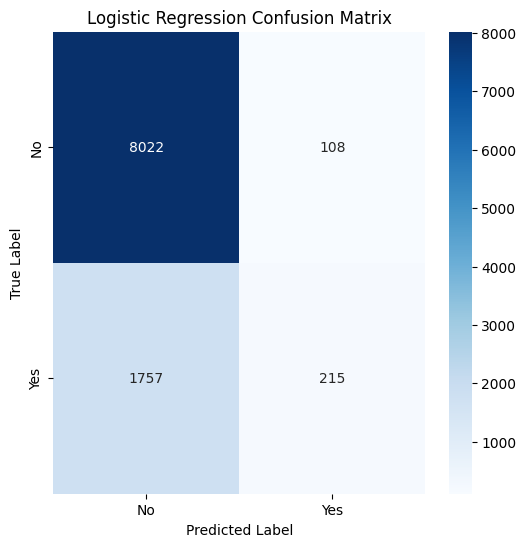

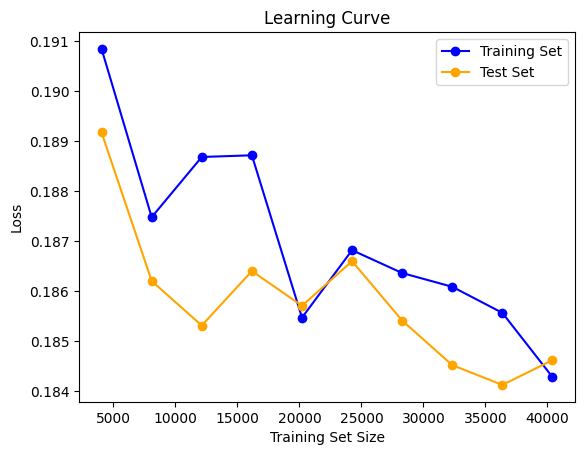

Classifier: Gaussian Naive Bayes


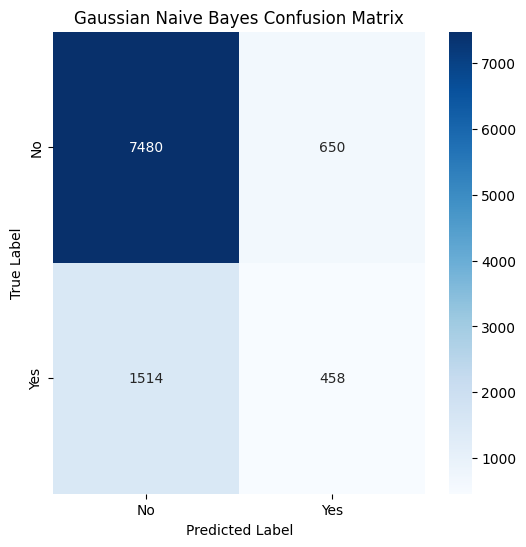

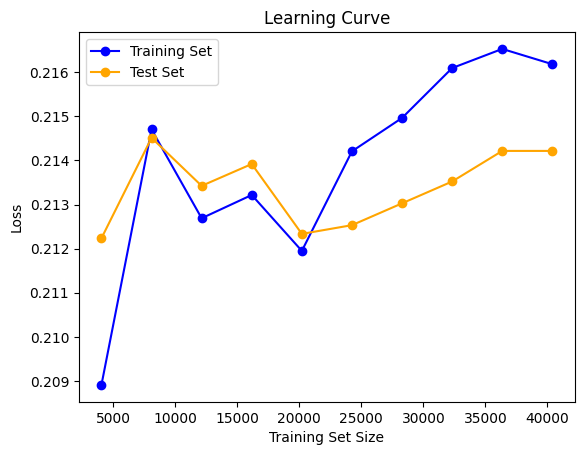

Classifier: Decision Tree


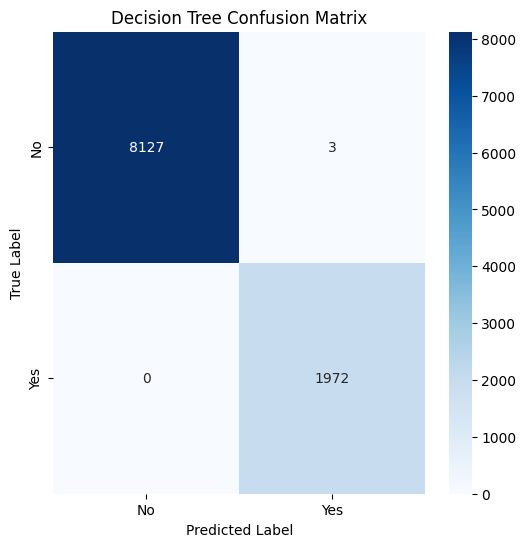

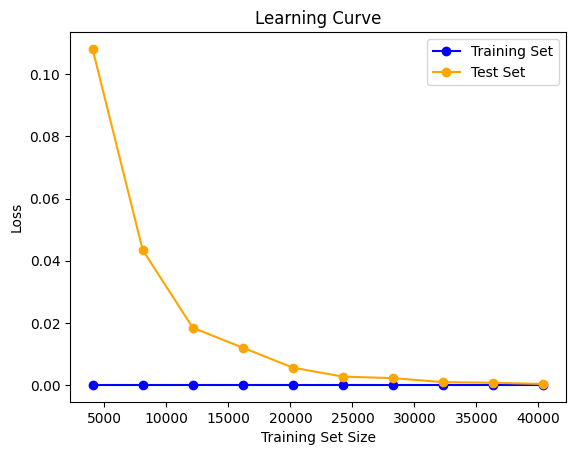

Classifier: Random Forest


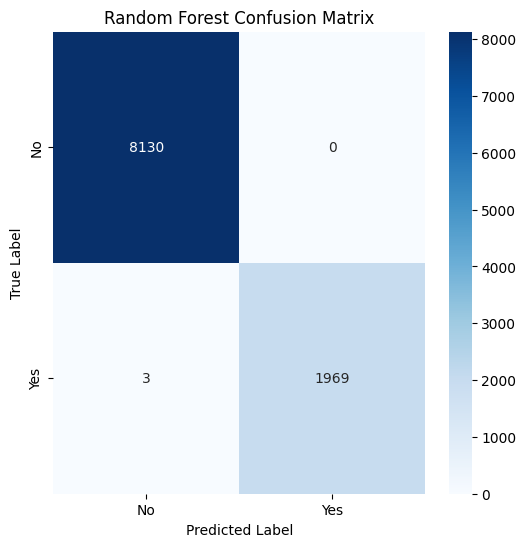

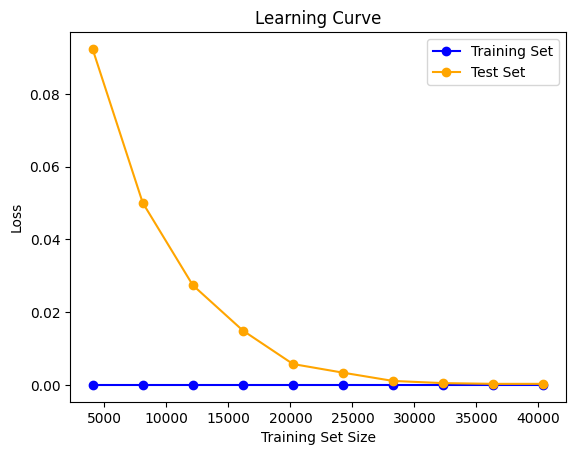

             Classifier  Accuracy  Precision    Recall      Loss
0   Logistic Regression  0.815383   0.665635  0.109026  0.184617
1  Gaussian Naive Bayes  0.785785   0.413357  0.232252  0.214215
2         Decision Tree  0.999703   0.998481  1.000000  0.000297
3         Random Forest  0.999703   1.000000  0.998479  0.000297


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.utils import resample

# Read the data from the CSV file
df = pd.read_csv('cleaned_combined.csv')

# Specify the features to be used for prediction
features = ['Sex', 'Age', 'Education', 'Current Smoker', 'Cigs Per Day', 'BPMeds',
            'Prevalent Stroke', 'Prevalent Hyp', 'Diabetes', 'TotChol', 'SysBP',
            'DiaBP', 'BMI', 'HeartRate', 'Glucose', 'Cp', 'Trestbps', 'Chol',
            'Fbs', 'Restecg', 'Thalach', 'Exang', 'Oldpeak', 'slope', 'ca', 'thal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['TenYearCHD'], test_size=0.2, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

results = []

for name, clf in classifiers.items():
    print("Classifier:", name)

    # Train the model on the training data
    clf.fit(X_train, y_train)

    # Calculate predictions on training and testing sets
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, test_predictions)
    precision = precision_score(y_test, test_predictions)
    recall = recall_score(y_test, test_predictions)
    loss = np.mean(test_predictions != y_test)

    results.append({'Classifier': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'Loss': loss})

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, test_predictions)
    tn, fp, fn, tp = cm.ravel()

    # Plot the confusion matrix
    labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = [tn, fp, fn, tp]
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(name + ' Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # Calculate the learning curve
    train_sizes, train_losses, test_losses = [], [], []

    for train_size in np.linspace(0.1, 1.0, 10):
        train_size = int(len(X_train) * train_size)
        X_subset = X_train[:train_size]
        y_subset = y_train[:train_size]

        clf.fit(X_subset, y_subset)

        train_subset_predictions = clf.predict(X_subset)
        test_subset_predictions = clf.predict(X_test)

        train_loss = np.mean(train_subset_predictions != y_subset)
        test_loss = np.mean(test_subset_predictions != y_test)

        train_sizes.append(train_size)
        train_losses.append(train_loss)
        test_losses.append(test_loss)

    # Plot the learning curve
    plt.plot(train_sizes, train_losses, 'o-', color='blue', label='Training Set')
    plt.plot(train_sizes, test_losses, 'o-', color='orange', label='Test Set')
    plt.xlabel('Training Set Size')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

# Display the results in table format
results_df = pd.DataFrame(results)
print(results_df)
